Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/german-rivman/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/german-rivman/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/german-rivman/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
<class 'torch.Tensor'> <class 'torch.Tensor'>
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/german-rivman/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
<class 'torch.Tensor'> <class 'torch.Tensor'>
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/german-rivman/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
<class 'torch.Tensor'> <class 'torch.Tensor'>


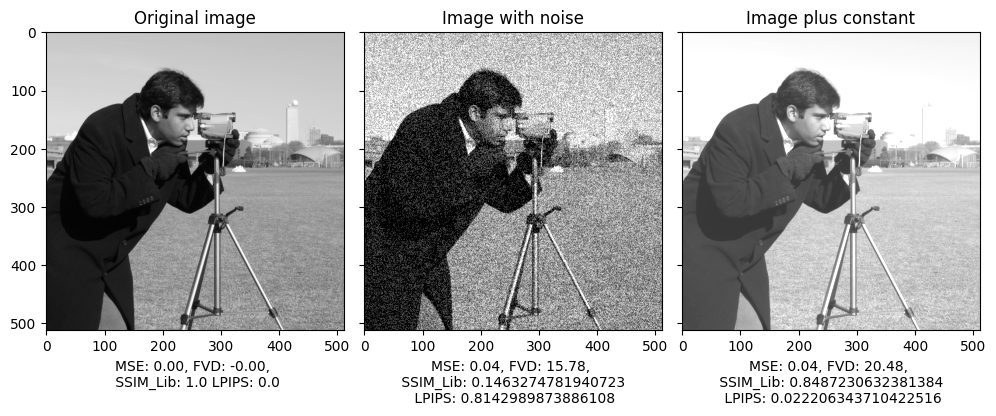

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from metrics import Metrics
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from torchvision import transforms
import torch
preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
img = img_as_float(data.camera())
# img = preprocess(image).unsqueeze(0)  # Add batch dimension
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
metric_none = Metrics(img, img)
fvd_none = metric_none.compute_fvd()
lpips_none = metric_none.compute_lpips()
# print(np.mean(ssim_none))
# print(ssim(img, img, data_range=img.max() - img.min()))

mse_noise = mean_squared_error(img, img_noise)
metric_noise = Metrics(img, img_noise)
fvd_noise = metric_noise.compute_fvd()
lpips_noise = metric_noise.compute_lpips()
# print(ssim_noise)
# print(ssim(img, img_noise, data_range=img_noise.max() - img_noise.min()))

mse_const = mean_squared_error(img, img_const)
metric_const = Metrics(img, img_const)
fvd_const = metric_const.compute_fvd()#ssim(img, img_const, data_range=img_const.max() - img_const.min())
lpips_const = metric_const.compute_lpips()

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
# print(ssim_none)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, FVD: {fvd_none:.2f}, \n SSIM_Lib: {ssim(img, img, data_range=img.max() - img.min())} LPIPS: {lpips_none}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, FVD: {fvd_noise:.2f}, \n SSIM_Lib: {ssim(img, img_noise, data_range=img_noise.max() - img_noise.min())} \n LPIPS: {lpips_noise}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, FVD: {fvd_const:.2f}, \n SSIM_Lib: {ssim(img, img_const, data_range=img_const.max() - img_const.min())} \n LPIPS: {lpips_const}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()


RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 0D

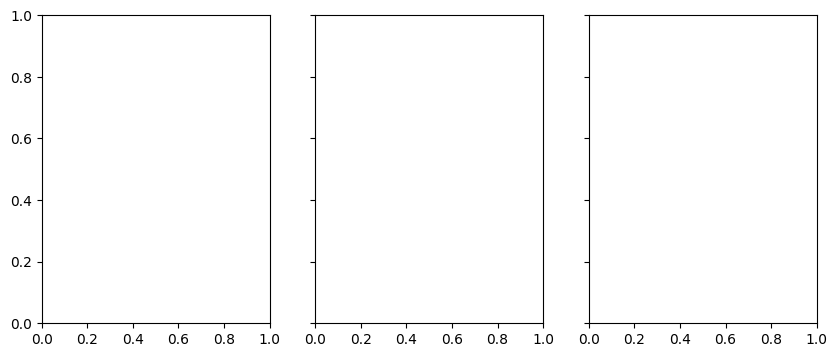